In [1]:
using Statistics
using MAT
using Measures
using DelimitedFiles
using Plots
using FFTW
include("FluidNetworkTools.jl")

dat2csv (generic function with 2 methods)

In [2]:
fileIn = matopen("./q_files/Re100_kb_0.625_Q_mg_3.mat")

q_hist  = read(fileIn, "q_hist") 
xb  = read(fileIn, "x_body") 
yb  = read(fileIn, "y_body") 
ẏb = read(fileIn, "vxb") 
ẋb = read(fileIn, "vyb") 

close(fileIn)

# Plot Fields
---

In [3]:
# iteration of interest
itr = 500

500

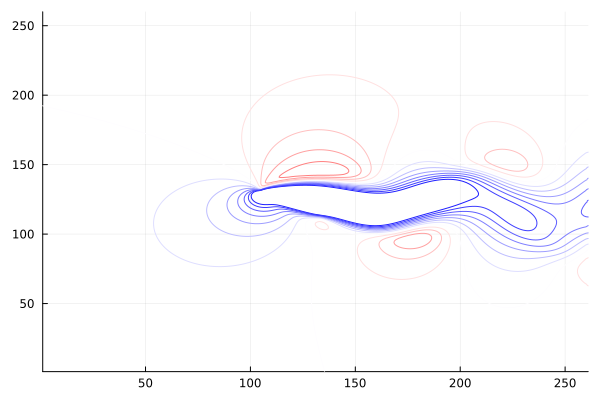

In [4]:
p_save = contour(reshape(q_hist[1:260*261,itr],261, 260)', c = :bwr, clim = (-0.015, 0.015), legend = :false)

savefig(p_save, "./plots/fluid_contour_x.png")

p_save

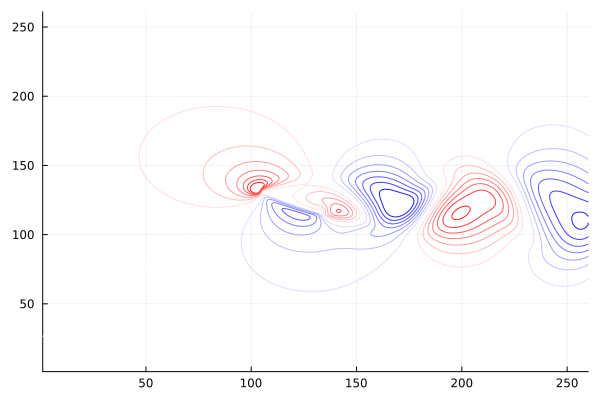

In [5]:
p_save = contour(reshape(q_hist[1+260*261:end,itr],260, 261)', c = :bwr, clim = (-0.015, 0.015), legend = :false)

savefig(p_save, "./plots/fluid_contour_y.png")

p_save

# Compute Modes 
---

In [6]:
X = q_hist[:,1:end-1];

res, singularvals = FluidNetworkTools.PODsvd(X);

In [7]:
sum(singularvals[1:8].^2 ./2)/sum(singularvals.^2 ./2)

0.9999838993235255

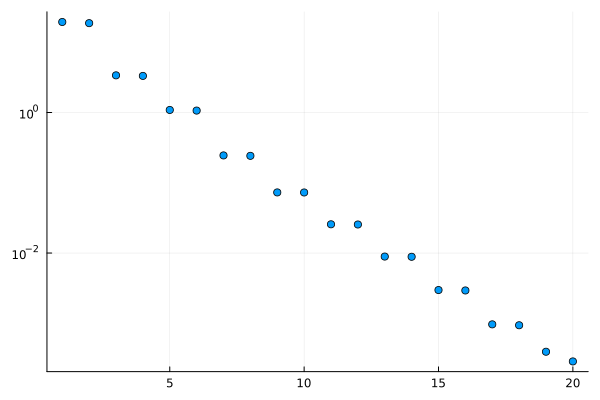

In [8]:
p_save = scatter(singularvals[1:1:20], yaxis = :log, legend = :false)

savefig(p_save, "./plots/fluid_mode_strength.png")

p_save

# Write Mode Files
---

NOTE: first file is the mean

In [9]:
# Collect mean and modes

A_mean = mean(q_hist, dims = 2);
A_modes = res.modes[:,1:18];
A_both = hcat(A_mean, A_modes);

In [10]:
for i in 1:1:9
    mode_name =  "mode_F_" * string(i) * ".dat"
    writedlm(mode_name, A_both[:,i], ',');
end

# New Plots
---

In [11]:
f_size = 10;

In [12]:
A_mean = mean(q_hist[1:260*261,:], dims = 2)

reconstructedMode = res.modes*res.coefficients;

contour(reshape(X[1:260*261,t],m,n)', 
    c = :RdBu,
    legend = false,
    color = :black,
    linestyle = :dash,
    title = "first mode")

contour(reshape(reconstructedMode[1:260*261,t] + A_mean[1:260*261], 261, 260)', 
        c = :bwr, 
        clim = (-0.015, 0.015))

plot!(ticks = :false, dpi = 300, colorbar = :false)

p_save = plot!(dpi = 300)

savefig(p_save,"./publication_plots/mean_x.png")

p_save

UndefVarError: UndefVarError: t not defined

In [13]:
A_mean = mean(q_hist[1+260*261:end,:], dims = 2)

reconstructedMode = res.modes*res.coefficients;

contour(reshape(X[1+260*261:end,t],m,n)', 
    c = :RdBu,
    legend = false,
    color = :black,
    linestyle = :dash,
    title = "first mode")

contour(reshape(reconstructedMode[1+260*261:end,t] + A_mean[1:end], 260, 261)', 
        c = :bwr, 
        clim = (-0.015, 0.015))

plot!(ticks = :false, dpi = 300, colorbar = :false)

p_save = plot!(dpi = 300)

savefig(p_save,"./publication_plots/mean_y.png")

p_save

UndefVarError: UndefVarError: t not defined

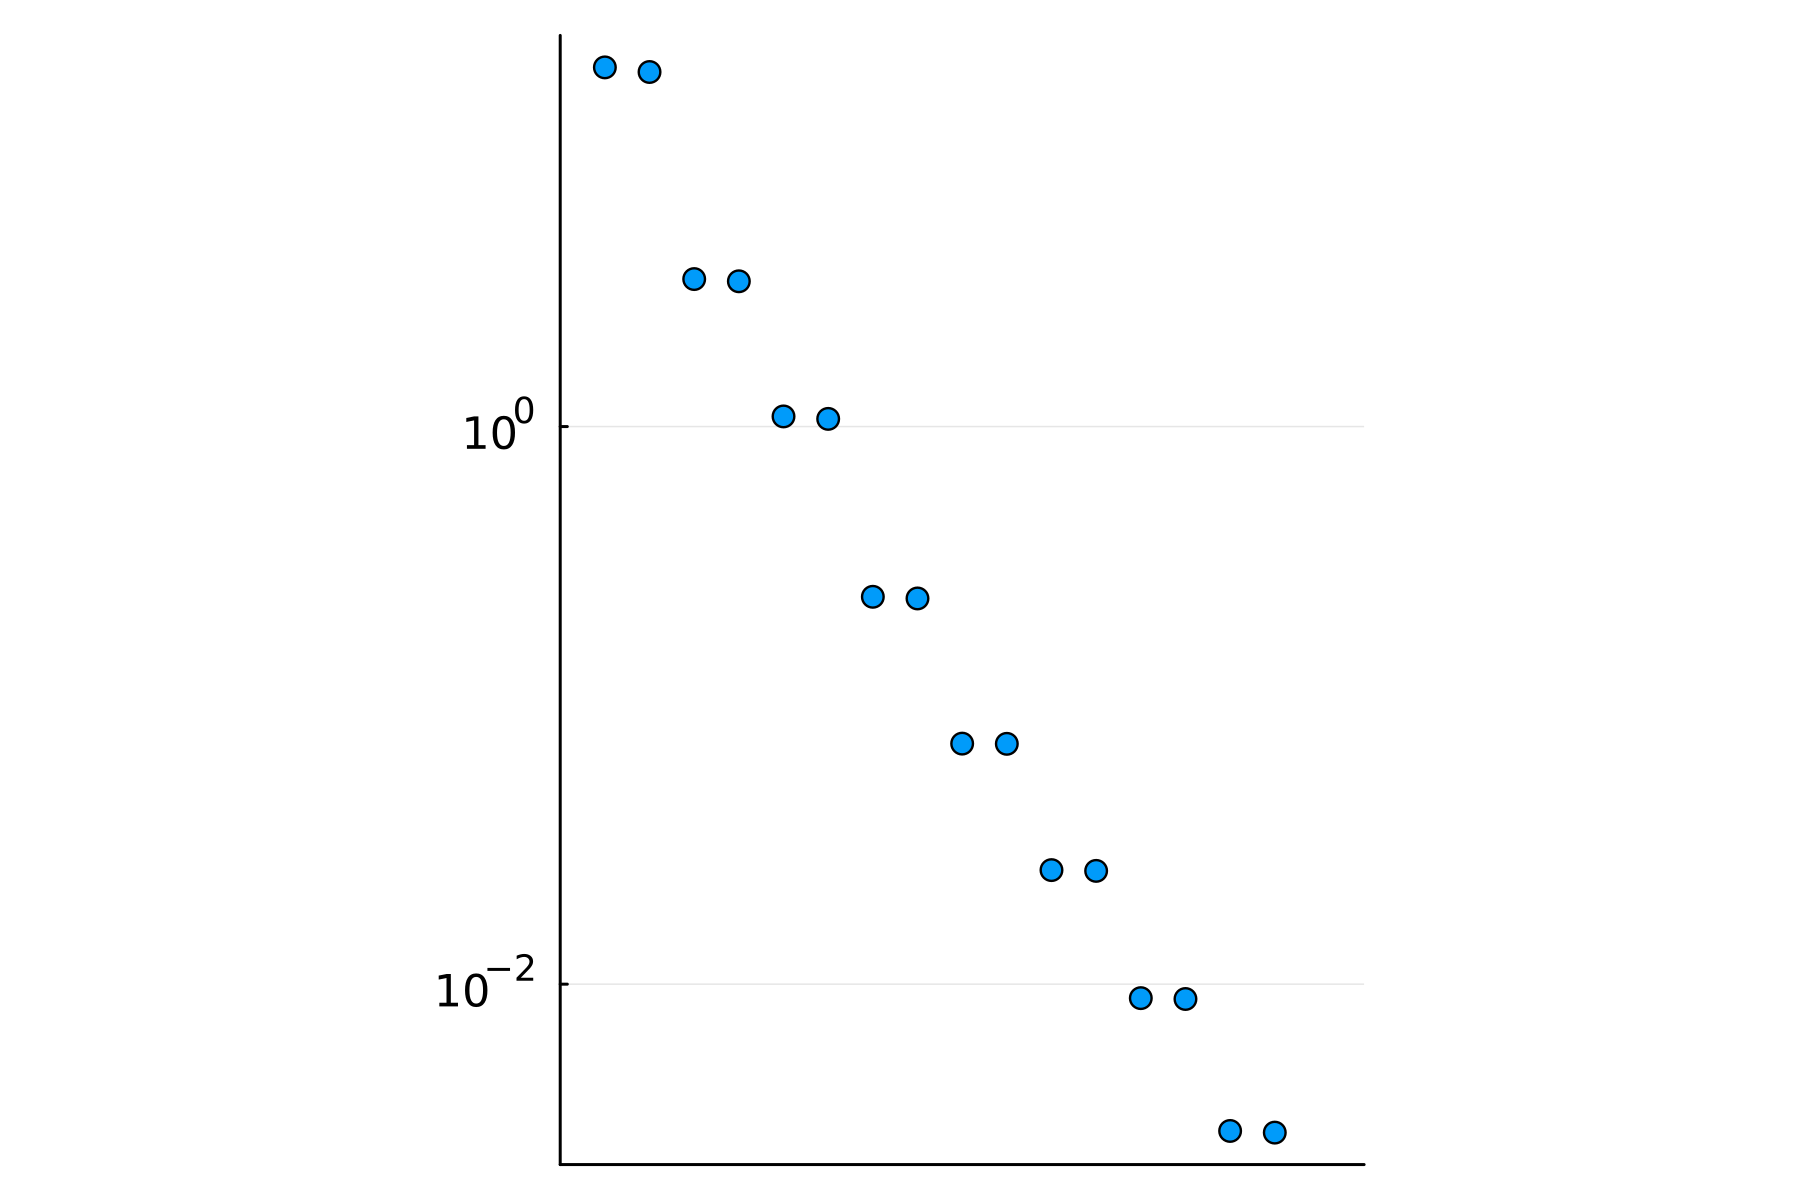

In [14]:
scatter(singularvals[1:1:16], yaxis = :log, legend = :false, markersize = 4)

p_save = plot!(aspect_ratio = 1, xtickfontsize = f_size, ytickfontsize = f_size, dpi = 300, xlim = (0, 18), xticks = :false)

savefig(p_save,"./publication_plots/modal_energy.png")

p_save

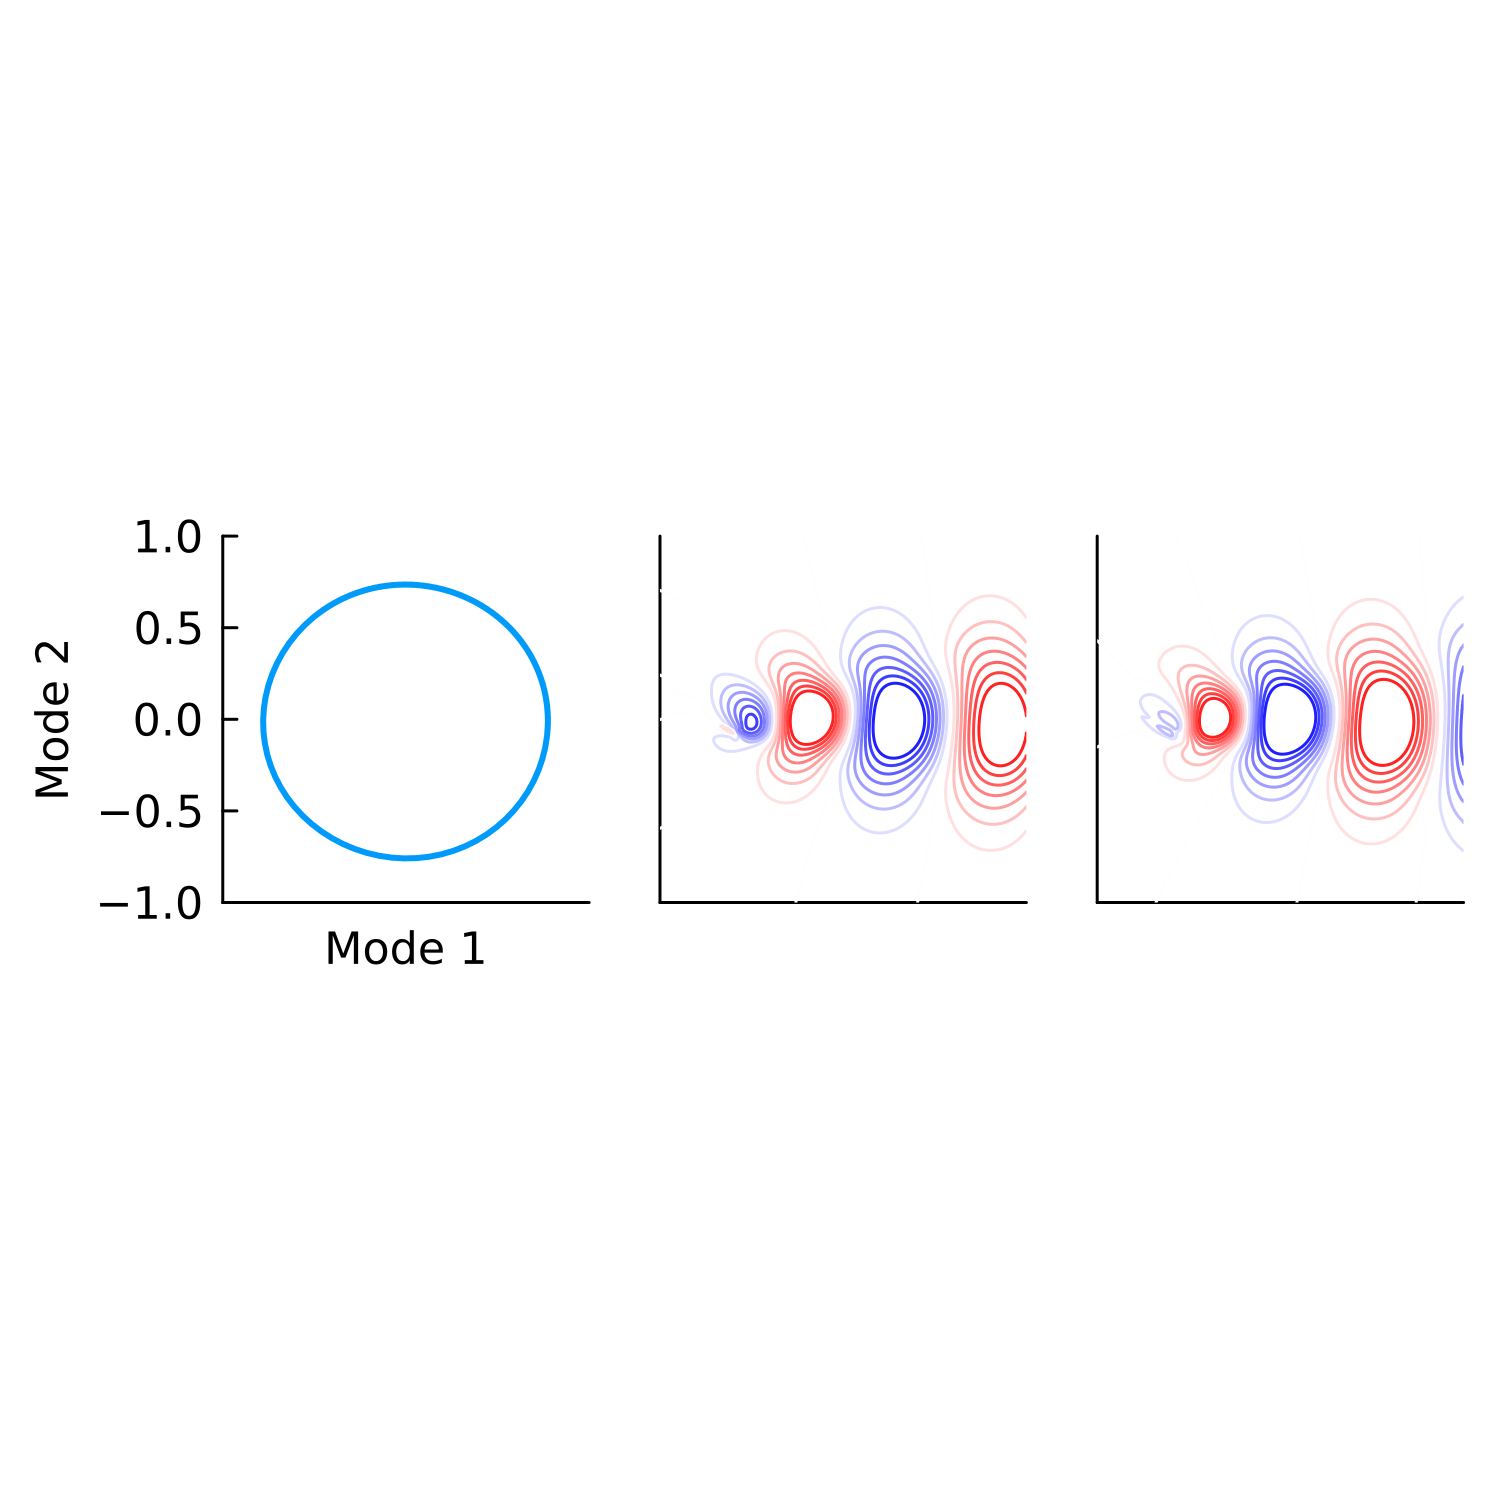

In [15]:
i = 1;

p0 = plot(res.coefficients[i,1:100], res.coefficients[i+1,1:100], 
        xlabel = string("Mode " * string(i)), 
        ylabel = string("Mode " * string(i+1)), 
        labelfontsize = f_size, 
        grid = :false, legend = :false, linewidth = 2, aspect_ratio = :equal, ylim = (-1, 1), xlim = (-1, 1),
        xtick =  :false, ytickfontsize = f_size) #leftmargin = 25mm, topmargin = 25mm, bottommargin = 25mm,

p1 = contour(reshape(A_modes[261*260+1:end,i], 260,261)', c = :bwr, clim = (-0.015, 0.015), grid = :false, colorbar = :false, aspect_ratio = :equal, xlim = (100, 260), ylim = (40, 200), size =(500, 500), ticks = :false)
p2 = contour(reshape(A_modes[261*260+1:end,i+1], 260,261)', c = :bwr, clim = (-0.015, 0.015), grid = :false, colorbar = :false, aspect_ratio = :equal, xlim = (100, 260), ylim = (40, 200), size =(500, 500), ticks = :false)
p3 = plot(res.coefficients[i,1:500], res.coefficients[i+1,1:500], 
        xlabel = string("Mode " * string(i)), 
        ylabel = string("Mode " * string(i+1)), 
        labelfontsize = 8, 
        xtickfontsize = 6, 
        ytickfontsize =6, grid = :false, legend = :false, linewidth = 1.5, aspect_ratio = :equal, ylim = (-1, 1)) #leftmargin = 25mm, topmargin = 25mm, bottommargin = 25mm,

plot(p0, p1, p2, layout = grid(1, 3))

p_save = plot!(dpi = 300)

savefig(p_save,"./publication_plots/phase_1.png")

p_save

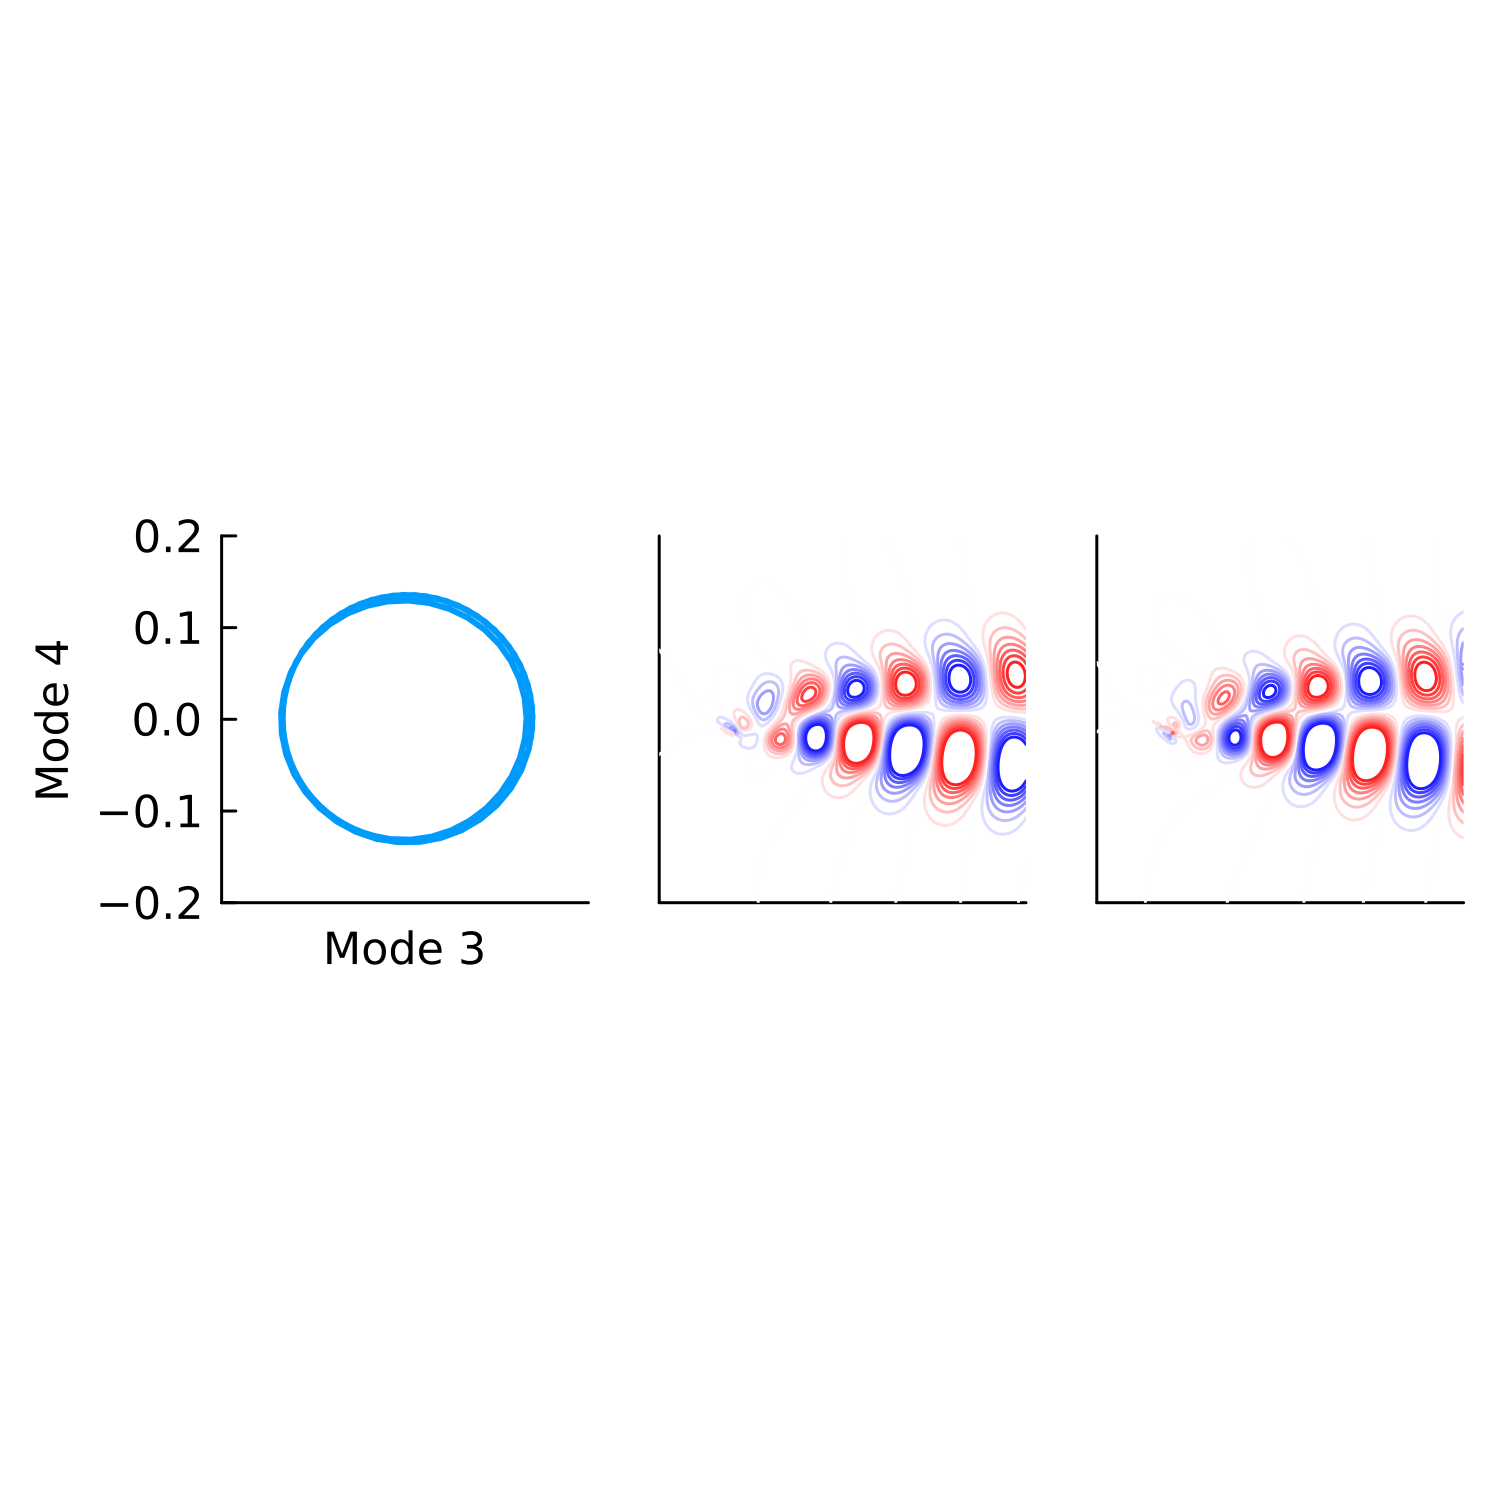

In [16]:
i = 3;

p0 = plot(res.coefficients[i,1:100], res.coefficients[i+1,1:100], 
        xlabel = string("Mode " * string(i)), 
        ylabel = string("Mode " * string(i+1)), 
        labelfontsize = f_size, 
        grid = :false, legend = :false, linewidth = 2, aspect_ratio = :equal, ylim = (-0.2, 0.2), xlim = (-0.2, 0.2),
        xtick =  :false, ytickfontsize = f_size) #leftmargin = 25mm, topmargin = 25mm, bottommargin = 25mm,

p1 = contour(reshape(A_modes[261*260+1:end,i], 260,261)', c = :bwr, clim = (-0.015, 0.015), grid = :false, colorbar = :false, aspect_ratio = :equal, xlim = (100, 260), ylim = (40, 200), size =(500, 500), ticks = :false)
p2 = contour(reshape(A_modes[261*260+1:end,i+1], 260,261)', c = :bwr, clim = (-0.015, 0.015), grid = :false, colorbar = :false, aspect_ratio = :equal, xlim = (100, 260), ylim = (40, 200), size =(500, 500), ticks = :false)
p3 = plot(res.coefficients[i,1:500], res.coefficients[i+1,1:500], 
        xlabel = string("Mode " * string(i)), 
        ylabel = string("Mode " * string(i+1)), 
        labelfontsize = 8, 
        xtickfontsize = 6, 
        ytickfontsize =6, grid = :false, legend = :false, linewidth = 1.5, aspect_ratio = :equal, ylim = (-1, 1)) #leftmargin = 25mm, topmargin = 25mm, bottommargin = 25mm,

plot(p0, p1, p2, layout = grid(1, 3))

p_save = plot!(dpi = 300)

savefig(p_save,"./publication_plots/phase_2.png")

p_save

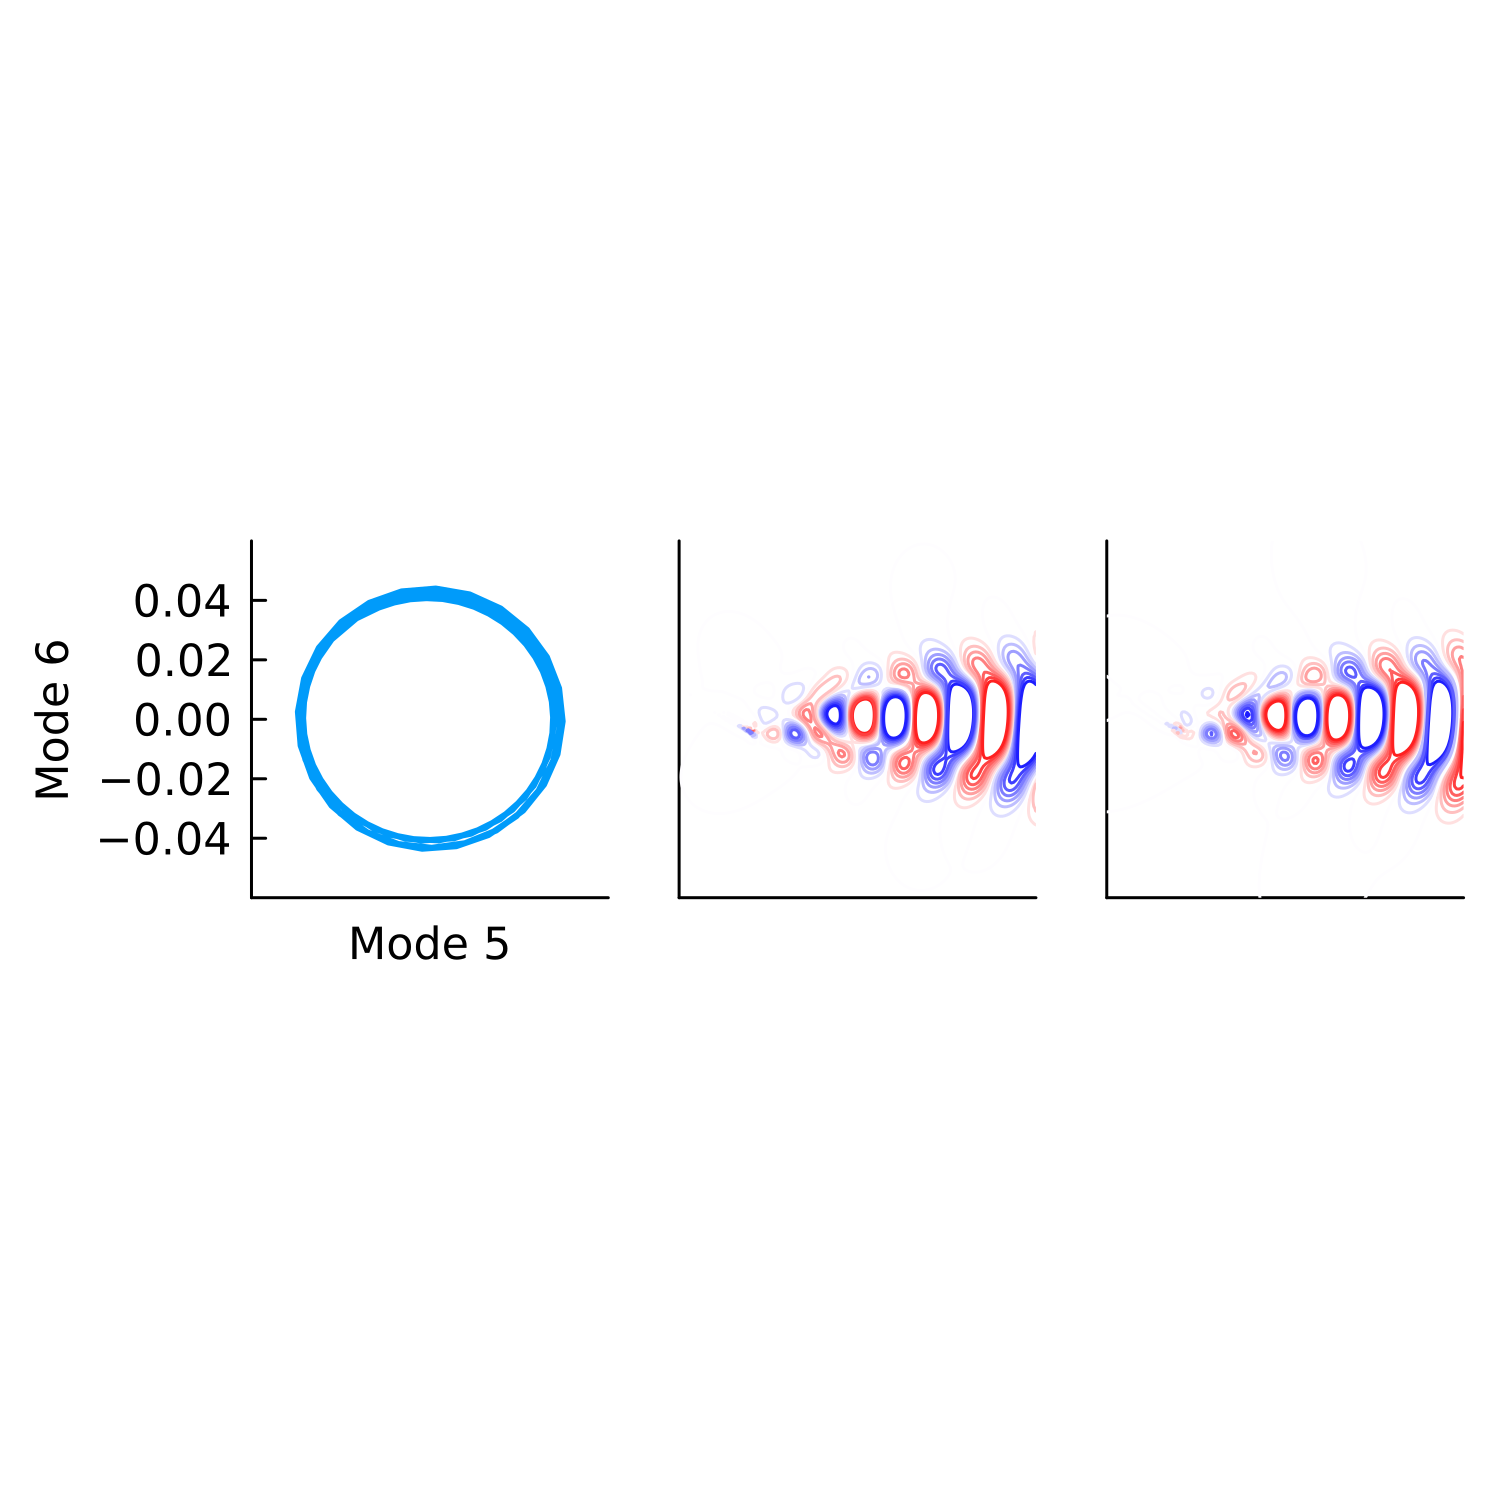

In [17]:
i = 5;

p0 = plot(res.coefficients[i,1:100], res.coefficients[i+1,1:100], 
        xlabel = string("Mode " * string(i)), 
        ylabel = string("Mode " * string(i+1)), 
        labelfontsize = f_size, 
        grid = :false, legend = :false, linewidth = 2, aspect_ratio = :equal, ylim = (-0.06, 0.06), xlim = (-0.06, 0.06),
        xtick =  :false, ytickfontsize = f_size) #leftmargin = 25mm, topmargin = 25mm, bottommargin = 25mm,

p1 = contour(reshape(A_modes[261*260+1:end,i], 260,261)', c = :bwr, clim = (-0.015, 0.015), grid = :false, colorbar = :false, aspect_ratio = :equal, xlim = (100, 260), ylim = (40, 200), size =(500, 500), ticks = :false)
p2 = contour(reshape(A_modes[261*260+1:end,i+1], 260,261)', c = :bwr, clim = (-0.015, 0.015), grid = :false, colorbar = :false, aspect_ratio = :equal, xlim = (100, 260), ylim = (40, 200), size =(500, 500), ticks = :false)
p3 = plot(res.coefficients[i,1:500], res.coefficients[i+1,1:500], 
        xlabel = string("Mode " * string(i)), 
        ylabel = string("Mode " * string(i+1)), 
        labelfontsize = 8, 
        xtickfontsize = 6, 
        ytickfontsize =6, grid = :false, legend = :false, linewidth = 1.5, aspect_ratio = :equal, ylim = (-1, 1)) #leftmargin = 25mm, topmargin = 25mm, bottommargin = 25mm,

plot(p0, p1, p2, layout = grid(1, 3))

p_save = plot!(dpi = 300)

savefig(p_save,"./publication_plots/phase_3.png")

p_save

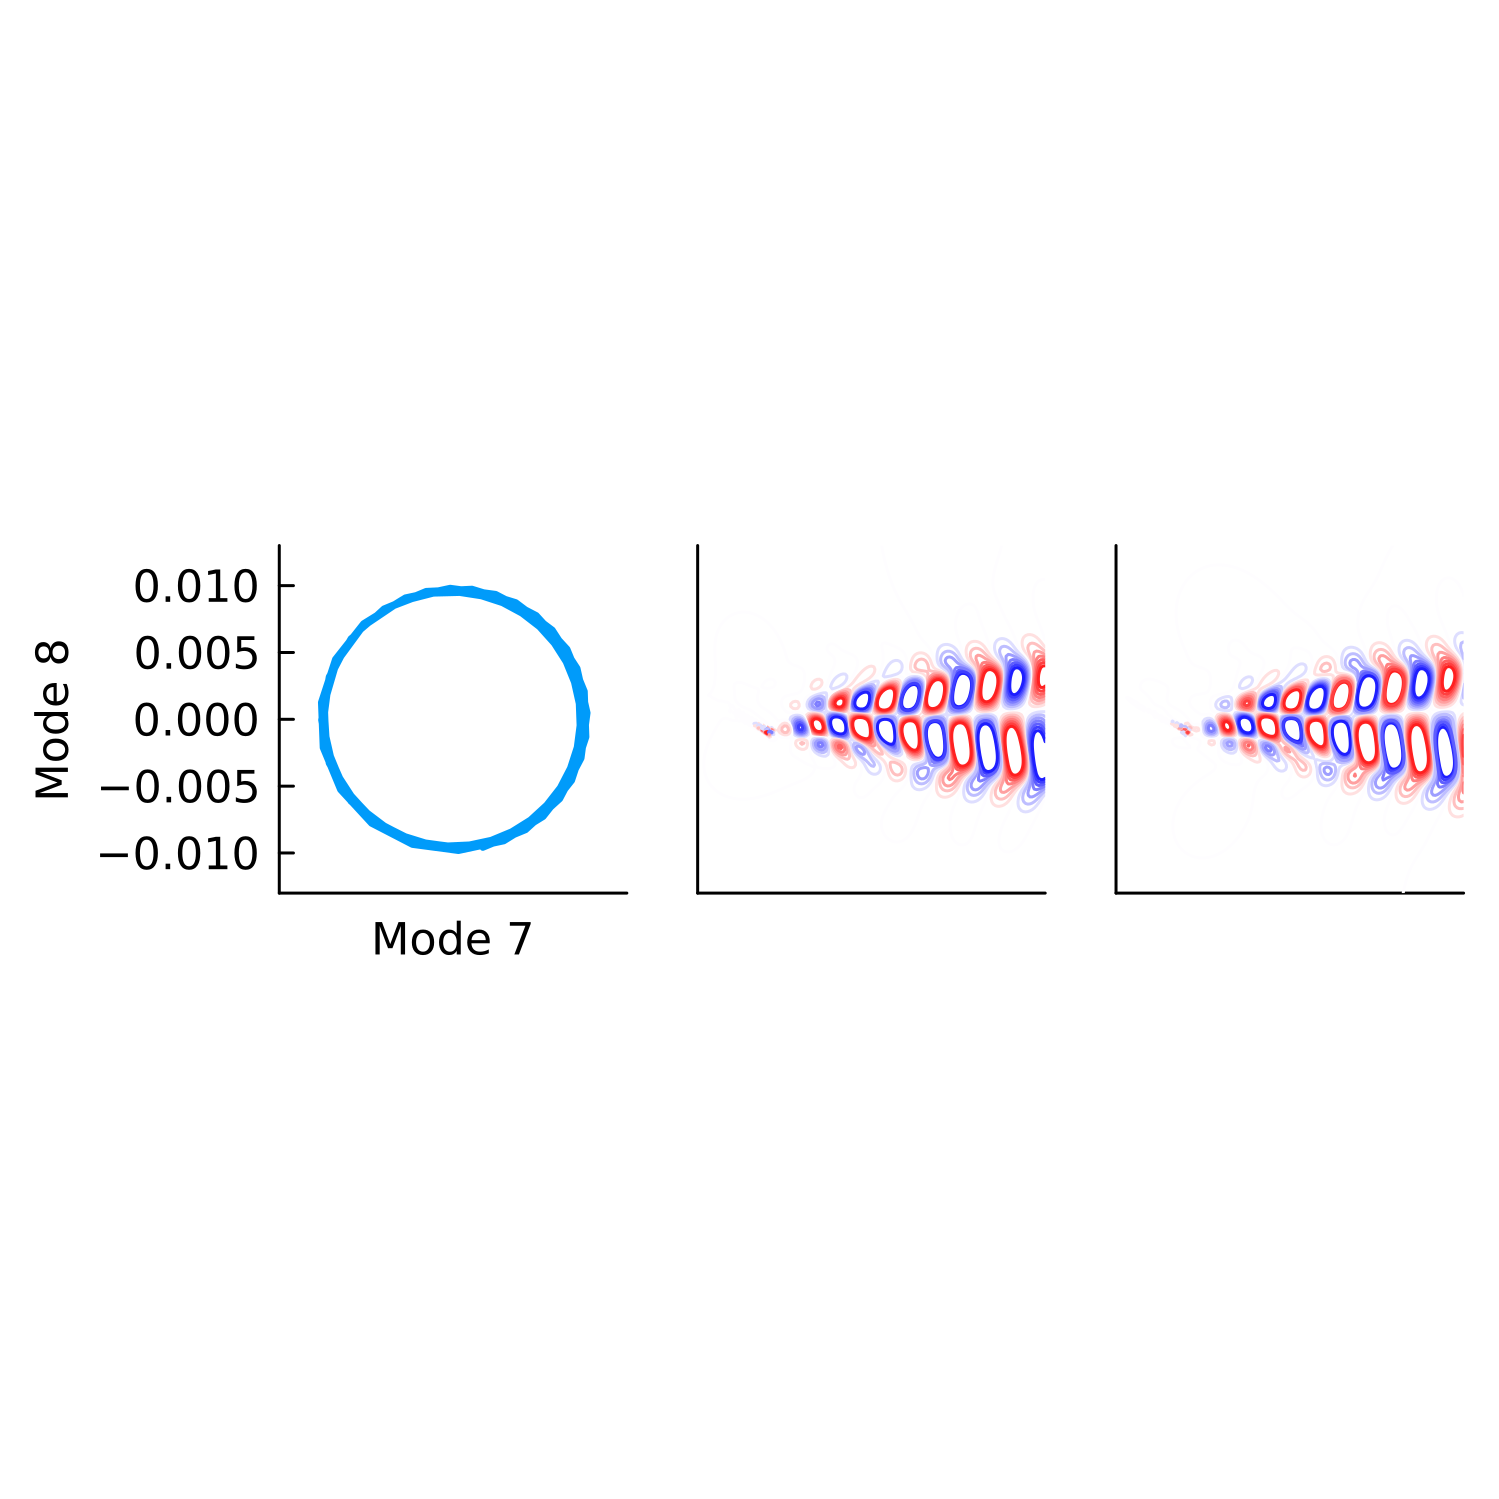

In [18]:
i = 7;

p0 = plot(res.coefficients[i,1:100], res.coefficients[i+1,1:100], 
        xlabel = string("Mode " * string(i)), 
        ylabel = string("Mode " * string(i+1)), 
        labelfontsize = f_size, 
        grid = :false, legend = :false, linewidth = 2, aspect_ratio = :equal, ylim = (-0.013, 0.013), xlim = (-0.013, 0.013),
        xtick =  :false, ytickfontsize = f_size) #leftmargin = 25mm, topmargin = 25mm, bottommargin = 25mm,

p1 = contour(reshape(A_modes[261*260+1:end,i], 260,261)', c = :bwr, clim = (-0.015, 0.015), grid = :false, colorbar = :false, aspect_ratio = :equal, xlim = (100, 260), ylim = (40, 200), size =(500, 500), ticks = :false)
p2 = contour(reshape(A_modes[261*260+1:end,i+1], 260,261)', c = :bwr, clim = (-0.015, 0.015), grid = :false, colorbar = :false, aspect_ratio = :equal, xlim = (100, 260), ylim = (40, 200), size =(500, 500), ticks = :false)
p3 = plot(res.coefficients[i,1:500], res.coefficients[i+1,1:500], 
        xlabel = string("Mode " * string(i)), 
        ylabel = string("Mode " * string(i+1)), 
        grid = :false, legend = :false, linewidth = 1.5, aspect_ratio = :equal, ylim = (-1, 1)) #leftmargin = 25mm, topmargin = 25mm, bottommargin = 25mm,

plot(p0, p1, p2, layout = grid(1, 3))

p_save = plot!(dpi = 300)

savefig(p_save,"./publication_plots/phase_4.png")

p_save

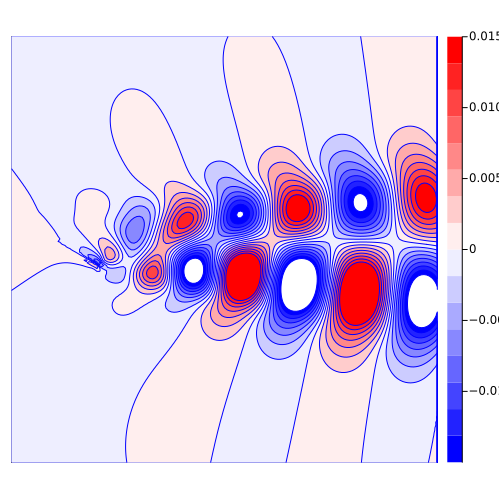

In [20]:
i = 3;


p_save = contourf(reshape(A_modes[261*260+1:end,i], 260,261)', c = :bwr, clim = (-0.015, 0.015), grid = :false, aspect_ratio = :equal, xlim = (100, 260), ylim = (40, 200), size =(500, 500), ticks = :false)

savefig(p_save,"./publication_plots/colorbar.png")

p_save

# Mode Injection
---

In [21]:
itr = 500
mode = 8
amp = 0.05

# Inject the POD mode
a = q_hist[:,itr] .+ res.modes[:,mode] .* amp

# # POD mode phase shift
# a = vcat(ẋb[:,itr],ẏb[:,itr]) .+ res.modes[:,mode] .* (amplitude[500-60] - amplitude[500])

# Subtract the mean
y_snap = a .- A_mean[:]

# Multiply by the POD mode
y_store = y_snap .* res.modes[:,mode]

# Summation of modes
b = 0.0

for i = 1:1:260*261*2# l = 66
   
    b = y_store[i] + b

end

# should return "amp"
println(b - res.coefficients[mode,itr])

DimensionMismatch: DimensionMismatch: arrays could not be broadcast to a common size; got a dimension with lengths 135720 and 67860

# Inner Product on non-Training Data
---

In [22]:
# Mode of interest

M = 3

# Subtract the mean
y_snap = a .- A_mean[:]

sam = []

# plot()

for j = 1:1:250
    
    a = q_hist[:,j]

    # Subtract the mean
    y_snap = a .- A_mean[:]

    for mode = M:1:M

        # Multiply by the POD mode
        y_store = y_snap .* res.modes[:,mode]

        # Summation of modes
        b = 0.0

        for i = 1:1:260*261*2
        
            b = y_store[i] + b

        end

    end

    push!(sam, b)

end

plot(sam, legend = :false)

DimensionMismatch: DimensionMismatch: arrays could not be broadcast to a common size; got a dimension with lengths 135720 and 67860